# GARCH model

Volatility is a statistical measure of the dispersion of returns for a given financial instrument. It quantifies the degree of variation in the price of an asset over a specific period. Volatility is an essential concept in finance as it helps investors and traders assess the risk associated with an investment.

Volatility forecasting involves predicting the future volatility of a financial instrument based on historical data.

Accurate volatility forecasts can assist in various financial applications, such as portfolio optimization, risk management and option pricing.

There are several methods for volatility forecasting, including historical volatility, implied volatility and model-based approaches. In this tutorial, we will focus on the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model, which is widely used for volatility forecasting.

### Steps to Compute the ARIMA Model

1. Load and cleaning the data
2. Data Analysis and Plotting Graphs
3. Implementation of Garch Model
4. Estimation Forecast volatility
5. Evaluating the Model Performance


In [22]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model

### 1. Load and cleaning the data

In [2]:
df = pd.read_csv('spy_minute_data.csv')
df.head(3)

,v,vw,o,c,h,l,t,n
0,1479.0,402.1955,402.02,402.50,402.50,402.02,1662710400000,26
1,1786.0,402.3996,402.44,402.34,402.52,402.34,1662710460000,11
2,1482.0,402.3789,402.35,402.43,402.45,402.35,1662710520000,13


In [3]:
# Rename columns
df.columns = ['volume', 'volume weighted', 'open', 'close', 'high', 'low', 'time', 'n']
df.head(1)

,volume,volume weighted,open,close,high,low,time,n
0,1479.0,402.1955,402.02,402.5,402.5,402.02,1662710400000,26


In [4]:
# change the timestamp to datetime format
df['time'] = pd.to_datetime(df['time'], unit='ms') #unit='ms' specify that timestamp is for milliseconds
df

,volume,volume weighted,open,close,high,low,time,n
0,1479.0,402.1955,402.02,402.50,402.50,402.02,2022-09-09 08:00:00,26
1,1786.0,402.3996,402.44,402.34,402.52,402.34,2022-09-09 08:01:00,11
2,1482.0,402.3789,402.35,402.43,402.45,402.35,2022-09-09 08:02:00,13
3,2667.0,402.5839,402.45,402.63,402.63,402.45,2022-09-09 08:03:00,16
4,982.0,402.5331,402.52,402.55,402.55,402.52,2022-09-09 08:04:00,12
...,...,...,...,...,...,...,...,...
49995,1759.0,395.0958,395.08,395.10,395.10,395.08,2022-11-29 21:17:00,11
49996,11688.0,395.0996,395.10,395.09,395.10,395.09,2022-11-29 21:18:00,31
49997,14419.0,395.1349,395.11,395.15,395.15,395.11,2022-11-29 21:19:00,44
49998,214.0,395.1369,395.13,395.13,395.13,395.13,2022-11-29 21:20:00,7


In [5]:
#check data - count the number of missing values
df_NaN = df.isna().sum()
print(f'Number of NaN values: {df_NaN}') #f-string to embed variables in a string

Number of NaN values: volume             0
volume weighted    0
open               0
close              0
high               0
low                0
time               0
n                  0
dtype: int64


In [6]:
#remove n colums
df = df.drop(columns=['n'])
df

,volume,volume weighted,open,close,high,low,time
0,1479.0,402.1955,402.02,402.50,402.50,402.02,2022-09-09 08:00:00
1,1786.0,402.3996,402.44,402.34,402.52,402.34,2022-09-09 08:01:00
2,1482.0,402.3789,402.35,402.43,402.45,402.35,2022-09-09 08:02:00
3,2667.0,402.5839,402.45,402.63,402.63,402.45,2022-09-09 08:03:00
4,982.0,402.5331,402.52,402.55,402.55,402.52,2022-09-09 08:04:00
...,...,...,...,...,...,...,...
49995,1759.0,395.0958,395.08,395.10,395.10,395.08,2022-11-29 21:17:00
49996,11688.0,395.0996,395.10,395.09,395.10,395.09,2022-11-29 21:18:00
49997,14419.0,395.1349,395.11,395.15,395.15,395.11,2022-11-29 21:19:00
49998,214.0,395.1369,395.13,395.13,395.13,395.13,2022-11-29 21:20:00


In [7]:
#from minutes to hours
df_hours = df[df['time'].dt.minute == 0]
df_hours

,volume,volume weighted,open,close,high,low,time
0,1479.0,402.1955,402.02,402.50,402.5000,402.02,2022-09-09 08:00:00
53,1220.0,403.6231,403.71,403.60,403.7100,403.60,2022-09-09 09:00:00
87,142.0,403.5345,403.53,403.53,403.5300,403.53,2022-09-09 10:00:00
136,4604.0,403.8504,403.91,403.80,403.9600,403.80,2022-09-09 11:00:00
193,43701.0,403.5593,403.67,403.26,403.8499,403.23,2022-09-09 12:00:00
...,...,...,...,...,...,...,...
49738,97416.0,394.5536,394.65,394.47,394.6600,394.46,2022-11-29 17:00:00
49798,106305.0,394.8071,394.94,394.70,394.9900,394.68,2022-11-29 18:00:00
49858,270600.0,395.3327,395.02,395.34,395.6100,395.01,2022-11-29 19:00:00
49918,142448.0,394.8201,394.73,394.79,394.9200,394.66,2022-11-29 20:00:00


In [8]:
#change numeration in the first colum
df_hours = df_hours.reset_index(drop=True)
df_hours

,volume,volume weighted,open,close,high,low,time
0,1479.0,402.1955,402.02,402.50,402.5000,402.02,2022-09-09 08:00:00
1,1220.0,403.6231,403.71,403.60,403.7100,403.60,2022-09-09 09:00:00
2,142.0,403.5345,403.53,403.53,403.5300,403.53,2022-09-09 10:00:00
3,4604.0,403.8504,403.91,403.80,403.9600,403.80,2022-09-09 11:00:00
4,43701.0,403.5593,403.67,403.26,403.8499,403.23,2022-09-09 12:00:00
...,...,...,...,...,...,...,...
864,97416.0,394.5536,394.65,394.47,394.6600,394.46,2022-11-29 17:00:00
865,106305.0,394.8071,394.94,394.70,394.9900,394.68,2022-11-29 18:00:00
866,270600.0,395.3327,395.02,395.34,395.6100,395.01,2022-11-29 19:00:00
867,142448.0,394.8201,394.73,394.79,394.9200,394.66,2022-11-29 20:00:00


### 2. Data Analysis and Plotting Graphs

In [27]:
# Statistics of data
df_hours['close'].describe().round(2)

count    869.00
mean     380.53
std       14.03
min      349.56
25%      368.44
50%      379.27
75%      394.20
max      413.80
Name: close, dtype: float64

In [9]:
#download the new csv file cleaned
df_hours.to_csv('spy_hourly_data.csv', index=False) 

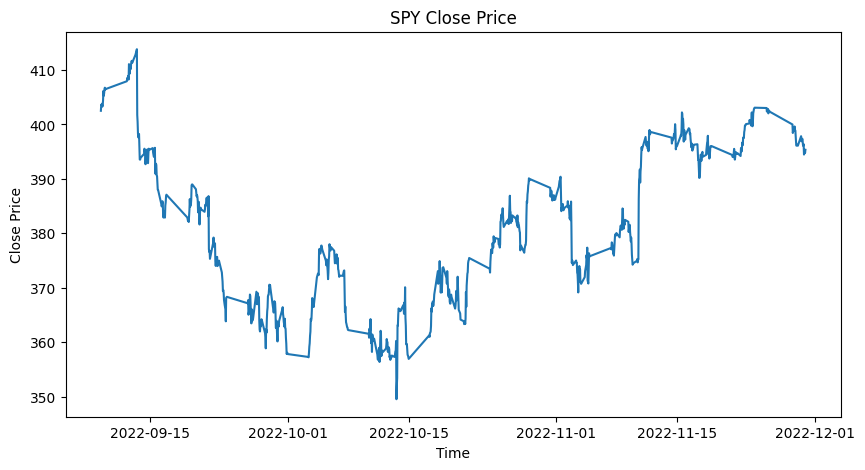

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(df_hours['time'], df_hours['close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('SPY Close Price')
plt.show()

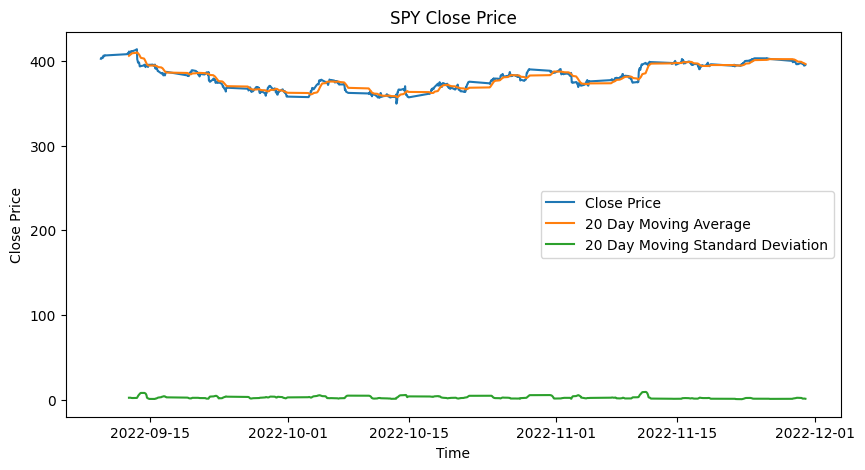

In [21]:
#rolling mean and standard deviation
rolling_mean = df_hours['close'].rolling(window=20).mean()
rolling_std = df_hours['close'].rolling(window=20).std()
#Plot the figure
plt.figure(figsize=(10, 5))
plt.plot(df_hours['time'], df_hours['close'], label='Close Price')
plt.plot(df_hours['time'], rolling_mean, label='20 Day Moving Average')
plt.plot(df_hours['time'], rolling_std, label='20 Day Moving Standard Deviation')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('SPY Close Price')
plt.show()

The rolling mean and standard deviation provide insights into the long-term trends and volatility clustering in the data. They help us identify periods of high and low volatility.

### 3. Implementation of Garch Model

In [24]:
#compute log returns
returns = np.log(df_hours['close']).diff().dropna()
#Fit the Garch model (1, 1)

In [28]:
model = arch_model(returns, vol="Garch", p=1, q=1) # p and q are the lag orders, we didn't specify the mean model, so it is assumed to be zero   
results = model.fit() # Fit the model

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.610678886216949e+20
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2924788508530764.5
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3533.976119893931
            Iterations: 3
            Function evaluations: 27
            Gradient evaluations: 2


c:\Users\Melectronics\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.795e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In this example, we are fitting a GARCH(1, 1) model, which includes one lag of both the returns and the conditional variance. 

In [30]:
# Estimate the volatility
volatility = results.conditional_volatility

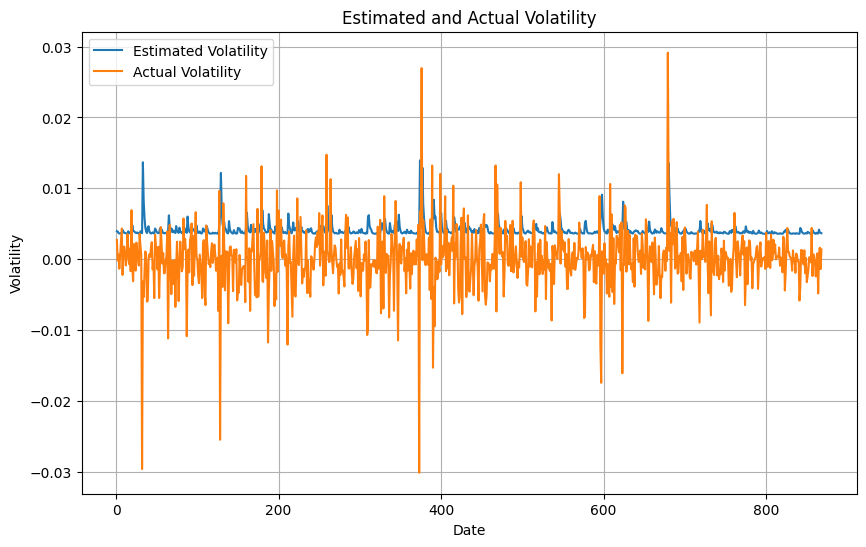

In [31]:
# Plot the estimated and actual volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility.index, volatility, label="Estimated Volatility")
plt.plot(returns.index, returns, label="Actual Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Estimated and Actual Volatility")
plt.legend()
plt.grid(True)

plt.show()

### 4. Estimation Forecast volatility

In [69]:
# Forecast the volatility
forecast = results.forecast(start=0, horizon=30) #fprecast the volatility for the next 30 periods
forecast_volatility = forecast.variance.dropna().values.flatten()


# Extract the forecasted volatility for tomorrow (first period in the forecast horizon)
forecast_variance_tomorrow = forecast.variance.iloc[-1, 0]
forecast_volatility_tomorrow = np.sqrt(forecast_variance_tomorrow) # Convert variance to volatility (standard deviation)
print("Next hour volatility:", forecast_volatility_tomorrow)


Next hour volatility: 0.00366963741385319


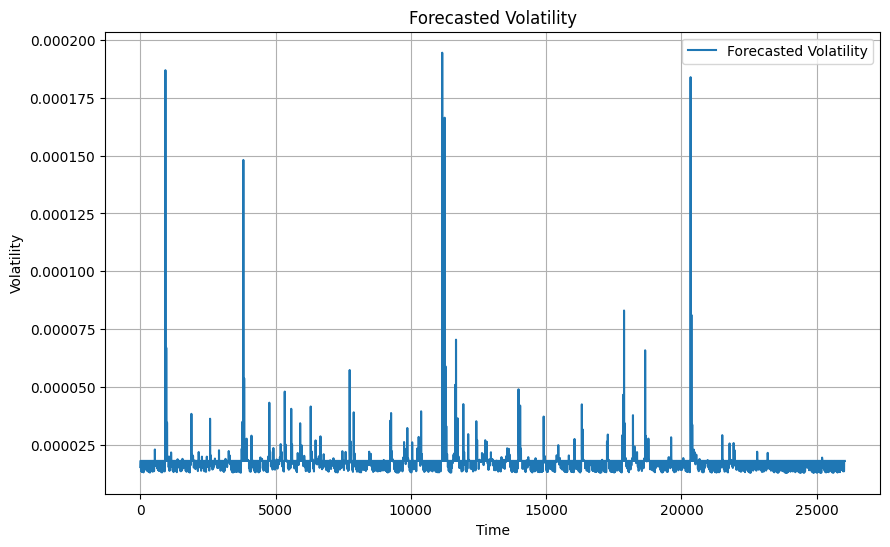

In [70]:
# Plot the forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(forecast_volatility, label="Forecasted Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Forecasted Volatility")
plt.legend()
plt.grid(True)

plt.show()

### 5. Evaluating the Model Performance

To evaluate the performance of our volatility forecasting model, we can calculate various metrics, such as the mean absolute error (MAE) and the root mean squared error (RMSE).
The MAE and RMSE provide measures of the average and overall forecast errors, respectively. Lower values indicate better model performance.

In [71]:
# Calculate the mean absolute error (MAE)
mae = np.mean(np.abs(volatility - returns))
print("Mean Absolute Error (MAE):", mae)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((volatility - returns) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.004743247158943944
Root Mean Squared Error (RMSE): 0.0060057359182875665


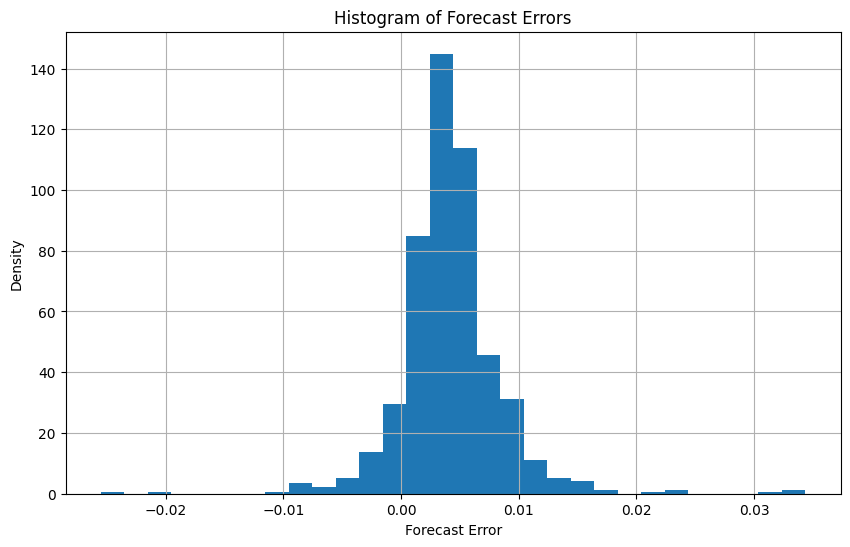

In [72]:
# Calculate the forecast errors
errors = volatility - returns
# Plot the histogram of forecast errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, density=True)
plt.xlabel("Forecast Error")
plt.ylabel("Density")
plt.title("Histogram of Forecast Errors")
plt.grid(True)

plt.show()

AIC and BIC Criteria
Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are statistical measures used to evaluate the goodness of fit of a model while penalizing for model complexity. Lower values of AIC and BIC indicate a better fit of the model to the data. AIC places a higher penalty on model complexity compared to BIC.

When fitting a GARCH model, we can calculate AIC and BIC to determine the optimal model specification that strikes a balance between model accuracy and complexity.

Backtesting
Backtesting is a technique used to assess the performance of a volatility forecasting model, such as a GARCH model, by comparing predicted values with observed data. By analyzing the residuals (difference between predicted and actual volatility), backtesting helps identify potential weaknesses or biases in the model.

In the context of GARCH models, backtesting involves calculating the squared standardized residuals and analyzing their distribution to check for consistency with assumed model properties. Deviations from expected distribution patterns may indicate model inadequacies or limitations.

Out-of-Sample Testing
Out-of-sample testing involves evaluating the forecasting performance of a model on data it has not been trained on. In the case of GARCH models, this means assessing how well the model forecasts volatility on unseen data. This validation technique helps determine the generalizability and robustness of the model in capturing volatility dynamics.

By splitting the data into training and testing sets, fitting the GARCH model on the training data and then forecasting volatility on the test data, we can measure the accuracy and reliability of the model’s predictions under real-world conditions.

next part to be finished:

In [ ]:
# Data preprocessing to remove NaN or infinite values
from arch import arch_model
import yfinance as yf
import numpy as np
import pandas as pd

data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define function for model evaluation
def evaluate_model(data):
    # Fit GARCH model
    am = arch_model(data['log_return'], mean='Zero', vol='Garch', p=1, q=1, rescale=True)
    res = am.fit(disp='off')

    # Calculate AIC and BIC
    aic = res.aic
    bic = res.bic

    # Perform backtesting
    residuals = data['log_return'] - res.conditional_volatility
    res_t = residuals / res.conditional_volatility
    backtest = (res_t**2).sum()

    # Out-of-sample testing
    data_length = len(data)
    train_size = int(0.8 * data_length)
    train_data = data[:train_size]
    test_data = data[train_size:]

    res_oos = am.fit(last_obs=train_data.index[-1], disp='off')
    forecast = res_oos.forecast(start=train_data.index[-1], horizon=len(test_data))

    # Calculate out-of-sample forecast error
    forecast_vol = forecast.residual_variance.iloc[-1, :]
    error = (test_data['log_return'] - forecast_vol).dropna()

    return aic, bic, backtest, error

# Evaluate the GARCH model using log returns data
aic, bic, backtest, forecast_error = evaluate_model(data)

# Print the evaluation results
print(f'AIC: {aic}')
print(f'BIC: {bic}')
print(f'Backtesting Result: {backtest}')

References:
https://theaiquant.medium.com/garch-models-for-volatility-forecasting-a-python-based-guide-d48deb5c7d7b
https://theaiquant.medium.com/mastering-volatility-forecasting-a-step-by-step-guide-to-building-a-powerful-garch-model-in-python-4aa4c03ec609